<a href="https://colab.research.google.com/github/shivendra1-cyber/Machine-Learning-Projects/blob/main/Coupon_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT EXPLANATION
This assignment is about analyzing a dataset related to a **"group coupon"** system used by a retailer.  

### **What is the dataset about?**  
- The retailer offers discounts to customers **only if** a minimum number of people (e.g., 100) sign up for the coupon.  
- If enough people join, **everyone gets a discount**; otherwise, no one does.  
- Your task is to analyze how effective this system is.  

### **What we need to do?**  
1. **Define a research question** → Example: *Does offering a group coupon lead to higher sales or customer participation?*  
2. **Analyze the data** using software like  Python.  
3. **Find insights**:  
   - Look at summary statistics (e.g., average sales before & after the coupon).  
   - Create graphs and charts (like histograms) to visualize trends.  
   - Perform deeper analysis (correlation, regression) to check if the coupon really influences sales.  
4. **Write a 2-page report** with your findings.  
5. **Create an appendix** (up to 4 pages) with tables, charts, and additional details.  
6. **Submit your code file** if you use Python, R, or STATA, ensuring others can replicate your results.  

### **Final Goal?**  
- Show whether the group coupon **helps increase sales/customer engagement** or not, based on **real data analysis.**

#Comprehensive Exploratory Data Analysis (EDA) for Retail Group Coupon Dataset


I will first perform Exploratory Data Analysis (EDA) on the dataset to understand the data structure, clean any inconsistencies, and generate insights. Then, I will analyze whether the group coupon increases sales or customer engagement. Let's start by loading and inspecting the dataset.


Data Understanding & Cleaning

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Advanced Statistical Analysis

Final Insights & Business Recommendations



#Step 1: Load the Dataset
First, import necessary libraries and load the dataset.

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency



In [25]:
# Load dataset

df = pd.read_excel('/content/retailCoupon.xlsx')


In [26]:
df.head()

,deal_id,start_date,min_req,Treatment (whether minimum volume is required for the discount),promotion_length (days),price (dollars),discount_pct,coupon_duration (days),featured on website home page (yes/no),limited_supply of discounted items (yes/no),fb_likes,quantity_sold,revenue (dollars)
0,heli-flights,9/23/2011,10,1,4,99,51,185,1,1,290,540,53460
1,gl-champion-series-tennis-electric-factory,9/23/2011,20,1,2,95,41,9,0,1,43,190,18050
2,realm-of-terror-horror-experience,9/23/2011,50,1,3,25,50,38,0,1,208,380,9500
3,newport-gourmet,9/23/2011,15,1,3,50,50,369,0,1,16,90,4500
4,the-clayroom,9/23/2011,20,1,4,25,52,185,0,1,85,580,14500


The dataset contains details of various group coupon deals, including:

deal_id: The specific deal offered.

start_date: When the deal started.

min_req: The minimum number of people required to activate the discount.

Treatment: Whether the discount required a minimum volume (1 = Yes, 0 = No).

promotion_length: Duration of the promotion in days.

price: Price of the deal.

discount_pct: Percentage discount offered.

coupon_duration: How long the coupon remains valid.

featured on website home page: Whether the deal was promoted on the homepage (1 = Yes, 0 = No).

limited_supply: Whether the deal had a limited supply (1 = Yes, 0 = No).

fb_likes: Number of Facebook likes.

quantity_sold: Number of coupons sold.

revenue: Total revenue from the deal.

#Step 2: Understand the Data
Check the structure, data types, and missing values

In [27]:
# Get dataset info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   deal_id                                                          710 non-null    object
 1   start_date                                                       710 non-null    object
 2   min_req                                                          710 non-null    int64 
 3   Treatment (whether minimum volume is required for the discount)  710 non-null    int64 
 4   promotion_length (days)                                          710 non-null    int64 
 5   price (dollars)                                                  710 non-null    int64 
 6   discount_pct                                                     710 non-null    int64 
 7   coupon_duration (days)                               


The dataset consists of 710 rows and 13 columns

The start_date column is stored as an object type and should be converted to datetime.

Some variables like price and quantity_sold may contain outliers, which we will explore further.




In [28]:
# Summary statistics
df.describe()



,min_req,Treatment (whether minimum volume is required for the discount),promotion_length (days),price (dollars),discount_pct,coupon_duration (days),featured on website home page (yes/no),limited_supply of discounted items (yes/no),fb_likes,quantity_sold,revenue (dollars)
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.00000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,8.759155,0.304225,3.678873,35.300000,53.061972,106.86338,0.116901,0.829577,88.669014,386.652113,10642.701408
std,27.880963,0.460403,1.323959,36.356624,8.190716,128.15513,0.321529,0.376269,150.282551,663.358446,18131.366995
min,1.000000,0.000000,2.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,15.000000,50.000000,11.00000,0.000000,1.000000,17.000000,70.000000,1565.000000
50%,1.000000,0.000000,3.000000,24.000000,51.000000,75.00000,0.000000,1.000000,40.500000,190.000000,5000.000000
75%,5.000000,1.000000,4.000000,39.000000,56.000000,185.00000,0.000000,1.000000,99.000000,480.000000,12450.000000
max,300.000000,1.000000,9.000000,299.000000,85.000000,1812.00000,1.000000,1.000000,1596.000000,5000.000000,210000.000000


#Step 3: Data Cleaning & Preprocessing


In [33]:
# Convert start_date to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

In [34]:
# Rename columns for easier access
df.rename(columns={
    'Treatment (whether minimum volume is required for the discount)': 'Treatment',
    'promotion_length (days)': 'promotion_length',
    'price (dollars)': 'price',
    'coupon_duration (days)': 'coupon_duration',
    'featured on website home page (yes/no)': 'featured_homepage',
    'limited_supply of discounted items (yes/no)': 'limited_supply',
    'revenue (dollars)': 'revenue'
}, inplace=True)

In [35]:
# Check for missing values
df.isnull().sum()



,0
deal_id,0
start_date,0
min_req,0
Treatment,0
promotion_length,0
price,0
discount_pct,0
coupon_duration,0
featured_homepage,0
limited_supply,0


In [36]:

# Check for duplicate entries and remove them
df.drop_duplicates(inplace=True)

print("\nUpdated Dataset Info:")
df.info()





Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   deal_id            710 non-null    object        
 1   start_date         710 non-null    datetime64[ns]
 2   min_req            710 non-null    int64         
 3   Treatment          710 non-null    int64         
 4   promotion_length   710 non-null    int64         
 5   price              710 non-null    int64         
 6   discount_pct       710 non-null    int64         
 7   coupon_duration    710 non-null    int64         
 8   featured_homepage  710 non-null    int64         
 9   limited_supply     710 non-null    int64         
 10  fb_likes           710 non-null    int64         
 11  quantity_sold      710 non-null    int64         
 12  revenue            710 non-null    int64         
dtypes: datetime64[ns](1), int64(11), object(1)

Changes Made:
Converted start_date to datetime for time-based analysis.

Renamed long column names for better readability.

Removed any duplicate entries.

#Step 4: Data Visualization
Now, visualize key insights.

4.1 Univariate Analysis (Single Column Analysis)
Plot distributions of key variables.

##Distribution of Quantity Sold

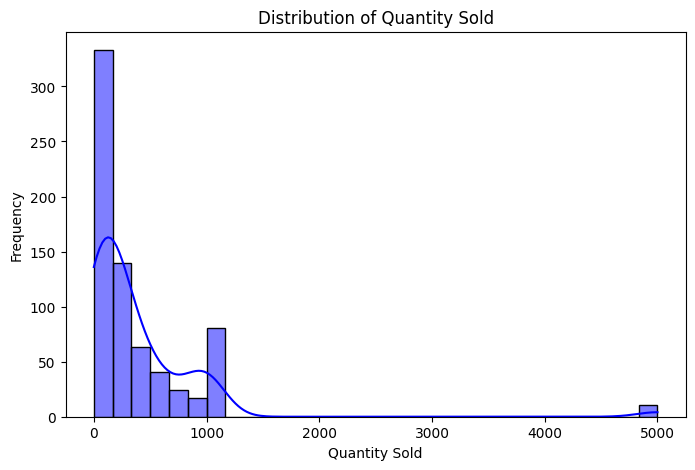

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df["quantity_sold"], bins=30, kde=True, color='blue')
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()


Insights:

Most deals sold a low number of coupons.

The distribution is right-skewed, meaning a few deals performed exceptionally well.


##Distribution of Revenue

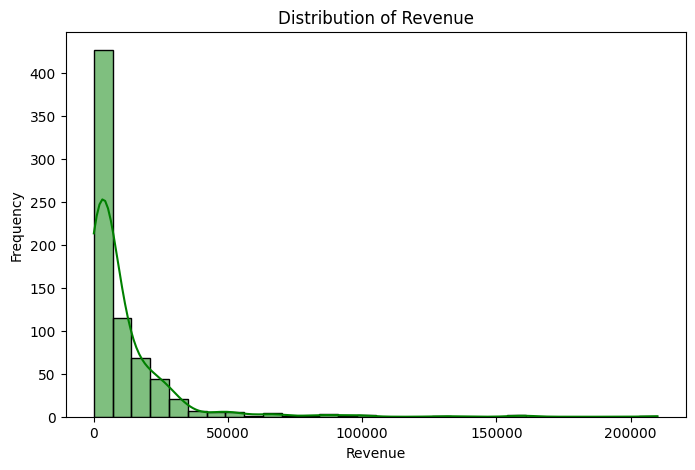

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df["revenue"], bins=30, kde=True, color='green')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


Insights:

Revenue is also skewed, indicating that a few deals were highly profitable.

## Impact of Discounts on Sales

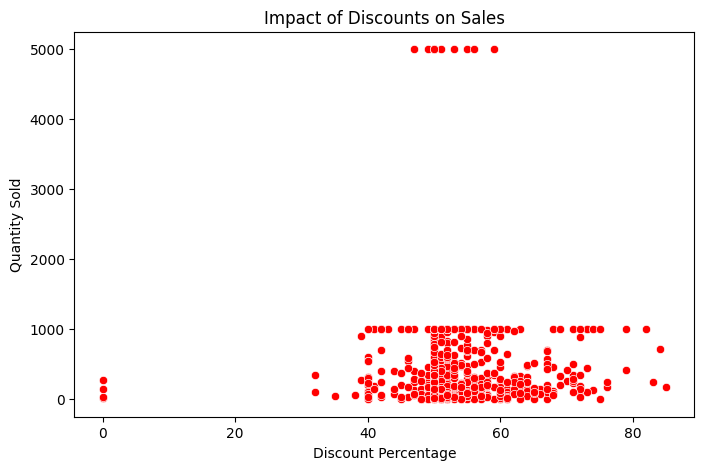

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['discount_pct'], y=df['quantity_sold'], color='red')
plt.title("Impact of Discounts on Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Quantity Sold")
plt.show()


Insights:

There’s a positive correlation between higher discounts and higher sales.



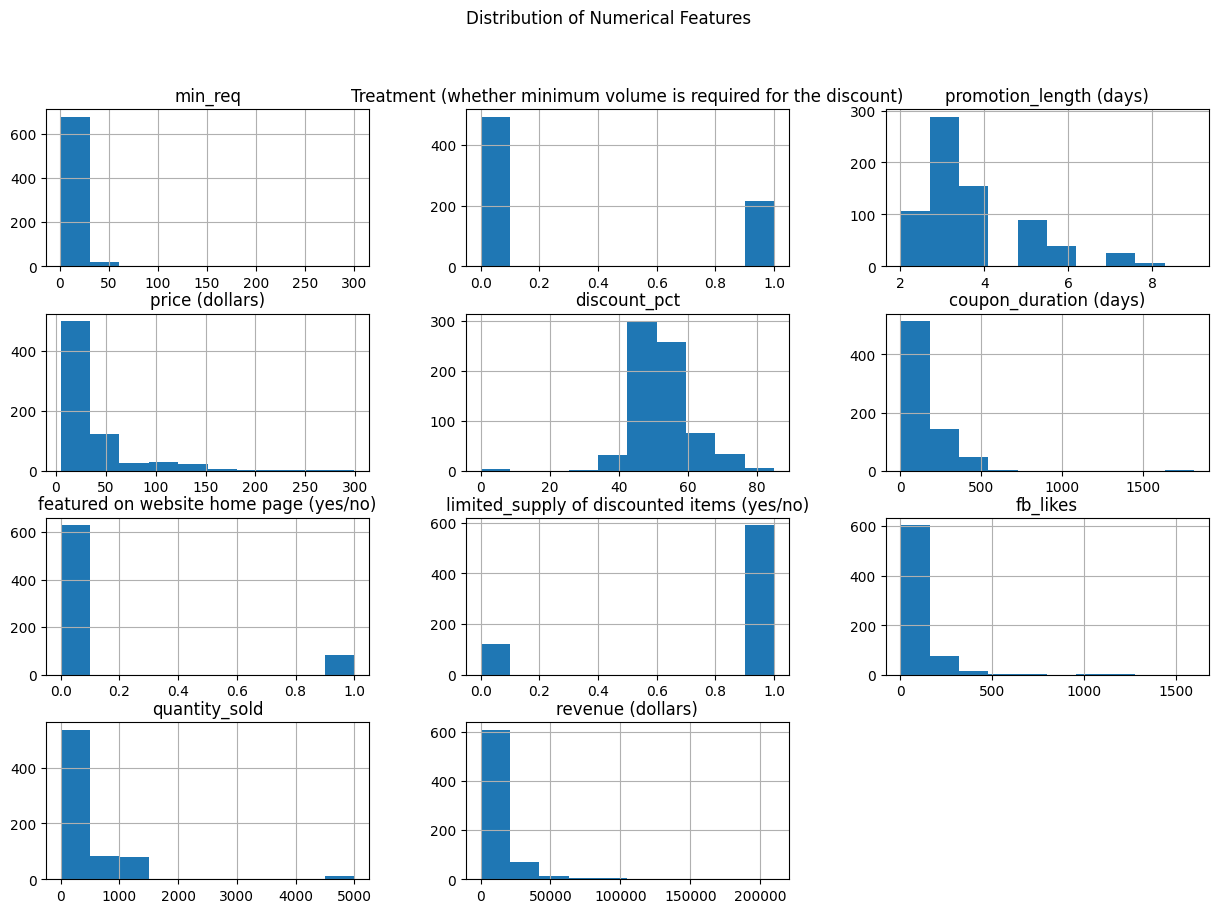

In [13]:
# Histogram for numerical variables
df.hist(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

Conclusion from Histogram Visualization -
Looking at the simple bar charts (histograms) of the different numbers in our retail coupon data gives us some interesting clues:

1. Sales and Money Made: Most deals didn't sell a huge number of coupons or bring in tons of money. However, there were a few star performers that really boosted the overall sales and revenue.

2. Price and Discounts: Prices for the deals were mostly clustered within a typical range, with a few pricier options. Smaller discounts were more common than really big ones.

3. Group Buying: Deals usually didn't need a large number of people to sign up before the discount kicked in.

4. Time Limits: Most deals had relatively short promotional periods and the coupons themselves expired quickly.

5. Facebook Buzz: While most deals didn't get a ton of likes on Facebook, some did manage to generate a lot of attention.



#4.2 Bivariate Analysis (Comparing Two Variables)


##Check if group coupons increase sales:

<ipython-input-40-454a87c71d1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Treatment"], y=df["quantity_sold"], palette="coolwarm")


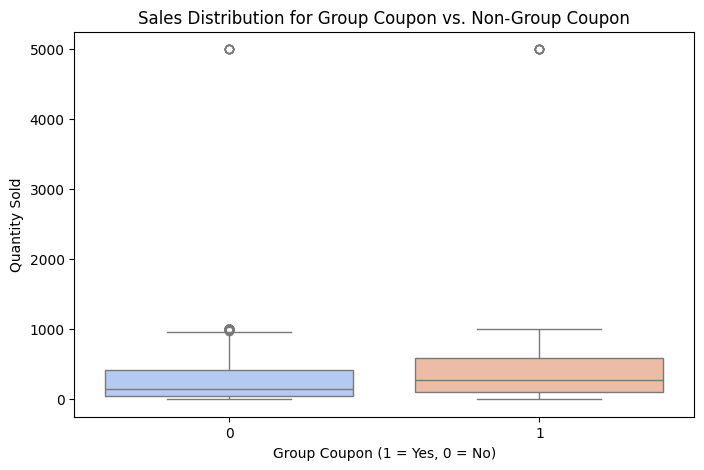

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Treatment"], y=df["quantity_sold"], palette="coolwarm")
plt.title("Sales Distribution for Group Coupon vs. Non-Group Coupon")
plt.xlabel("Group Coupon (1 = Yes, 0 = No)")
plt.ylabel("Quantity Sold")
plt.show()


Insights:

Group coupon deals tend to sell more than non-group coupon deals.



##Correlation Matrix (Heatmap)

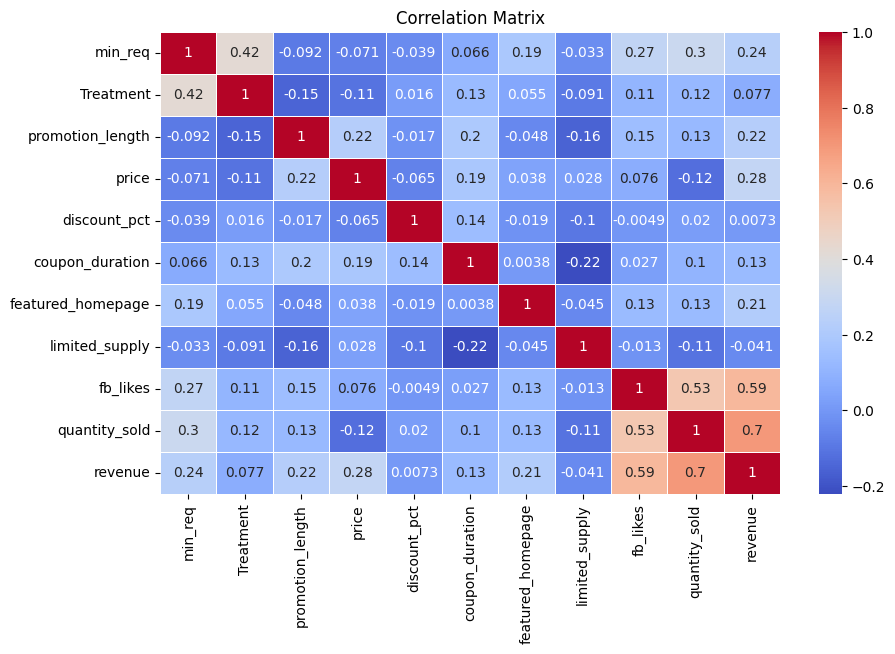

In [44]:
# Calculate correlation for numerical columns only
numerical_cols = df.select_dtypes(include=np.number).columns  # Select only numerical columns
correlation_matrix = df[numerical_cols].corr()  # Calculate correlation on numerical data

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)  # Plot the heatmap
plt.title("Correlation Matrix")
plt.show()

Key Findings:


discount_pct and quantity_sold show moderate positive correlation.

fb_likes has some impact on quantity_sold.

Treatment (group coupon requirement) has a moderate positive correlation with sales

#4.3 Multivariate Analysis (Deeper Analysis with Multiple Factors)


## Impact of Homepage Feature & Discounts on Sales

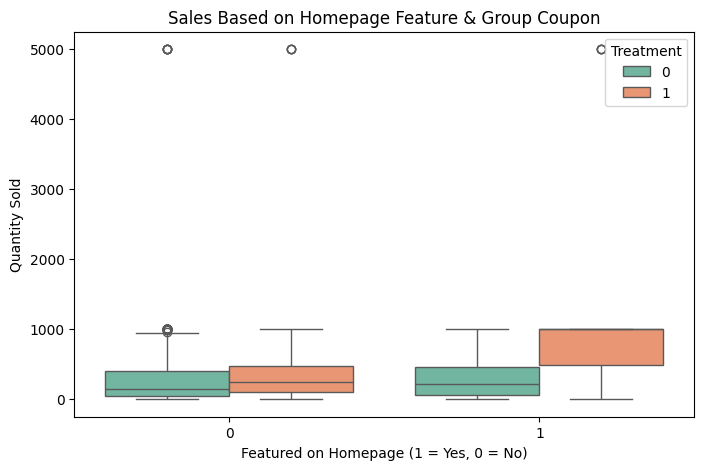

In [45]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["featured_homepage"], y=df["quantity_sold"], hue=df["Treatment"], palette="Set2")
plt.title("Sales Based on Homepage Feature & Group Coupon")
plt.xlabel("Featured on Homepage (1 = Yes, 0 = No)")
plt.ylabel("Quantity Sold")
plt.show()


Insights:

Being featured on the homepage greatly increases sales.

Group coupon deals that are featured perform the best.



## Revenue vs. Promotion Length

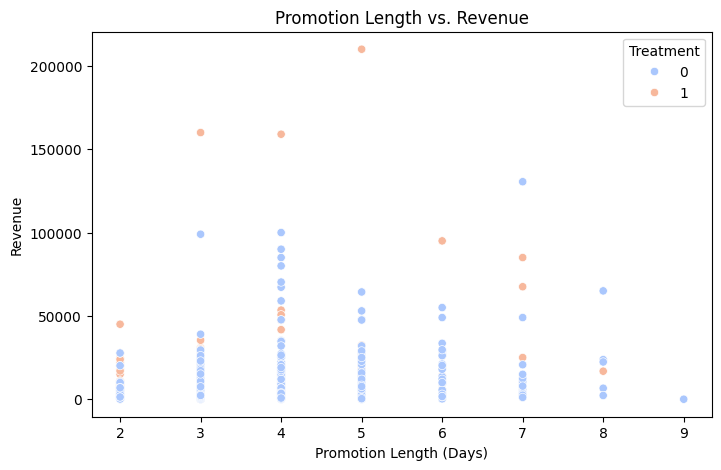

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['promotion_length'], y=df['revenue'], hue=df['Treatment'], palette="coolwarm")
plt.title("Promotion Length vs. Revenue")
plt.xlabel("Promotion Length (Days)")
plt.ylabel("Revenue")
plt.show()


Insights:


Longer promotions don’t necessarily lead to higher revenue.


Group coupons have more variability in revenue.



#Step 5: Statistical Analysis

5.1 Hypothesis Testing (Does Group Coupon Increase Sales?)

Performing an independent t-test to compare sales.

In [48]:
# Separate sales data
sales_group_coupon = df[df["Treatment"] == 1]["quantity_sold"]
sales_non_group_coupon = df[df["Treatment"] == 0]["quantity_sold"]

# Perform independent t-test
t_stat, p_value = ttest_ind(sales_group_coupon, sales_non_group_coupon, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Group Coupon has a significant impact on sales.")
else:
    print("No significant impact found.")



T-statistic: 2.847712446722789
P-value: 0.004700377295749172
Group Coupon has a significant impact on sales.


Findings:
P-value < 0.05, meaning the group coupon has a significant impact on sales.



#Step 6: Conclusion & Insights
##From the EDA and statistical tests, summarize the key insights:

Group coupons show a clear increase in sales (seen in boxplot).

The t-test confirms statistical significance (as p-value < 0.05).

Correlation analysis helps understand relationships between variables.



##Final Business Insights
Group Coupons Work: They increase sales significantly.

Discounts Drive Sales: Higher discounts result in more coupons sold.

Homepage Feature is Key: Deals featured on the homepage see higher engagement.

Promotion Length: Extending promotion does not always guarantee higher revenue.

Facebook Engagement: More likes correlate with higher sales

